# Import package

In [2]:
import os
os.environ['PYTHONHASHSEED']=str(100)
 
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout, Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
 
%matplotlib inline
 
sns.set()
 
warnings.filterwarnings("ignore")
 
plt.style.use('ggplot')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
 
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(100)
   tf.random.set_seed(100)
   np.random.seed(100)
   random.seed(100)

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Load file

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/Kuliah/Skripsi/CPO-bappebti.csv', parse_dates=['Tanggal'])
df = df[df['Penyerahan'] == "SPOT"].reset_index(drop = True)
df = df[["Tanggal", "Harga"]]

price = df.Harga.values.reshape(-1, 1)

In [ ]:
#df.to_excel(r'/content/gdrive/My Drive/Kuliah/Skripsi/CPO-bappebti.xlsx', index = False)

# PACF

## All data

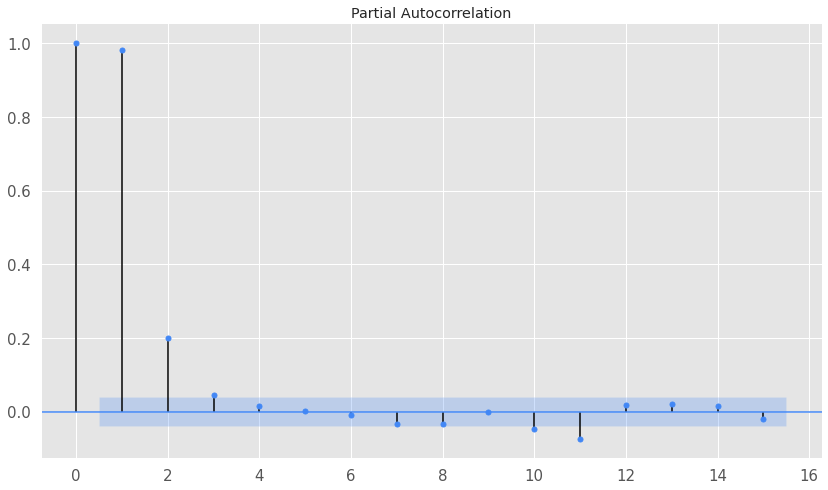

In [6]:
from matplotlib.collections import PolyCollection, LineCollection
from statsmodels.graphics.tsaplots import plot_pacf

curr_fig, curr_ax = plt.subplots(figsize=(14, 8))

plot_pacf(price, method="ywm", lags=15,ax=curr_ax)

for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor("#4287f5")
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color("black")    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color("#4287f5")

plt.show()

In [7]:
from statsmodels.tsa.stattools import acf, pacf

pacf_p = pacf(price, method="ywm")
pacf_p

array([ 1.        ,  0.98127428,  0.19953022,  0.04514618,  0.01615032,
        0.00223357, -0.00762896, -0.03212051, -0.03353157, -0.00157871,
       -0.04724234, -0.07281528,  0.01946892,  0.02118141,  0.01510836,
       -0.01897274,  0.0413015 , -0.02243491, -0.01785688, -0.04516564,
       -0.01384831,  0.01390231, -0.01051795, -0.00536158, -0.01965965,
        0.00750464,  0.03958263,  0.00423953,  0.02215697, -0.01725288,
       -0.00988067, -0.01895588, -0.03277654,  0.02200037, -0.00921009,
        0.01780401,  0.00272609,  0.00842734, -0.0162083 , -0.0015195 ,
       -0.02172579])

In [8]:
acf_p = acf(price)
acf_p

array([1.        , 0.98127428, 0.97030194, 0.95955531, 0.9491394 ,
       0.93874382, 0.92818162, 0.91671511, 0.90467611, 0.89320407,
       0.88018477, 0.86547819, 0.85269267, 0.84039898, 0.82847102,
       0.81575253, 0.80482501, 0.79243012, 0.7800423 , 0.7664994 ,
       0.75318248, 0.74077294, 0.72820782, 0.71579303, 0.7026981 ,
       0.69031669, 0.67940105, 0.66796067, 0.6573647 , 0.64585529,
       0.63473796, 0.62326383, 0.61123935, 0.60055943, 0.58942795,
       0.5794024 , 0.56923462, 0.55938087, 0.54885633, 0.53870453,
       0.52792848])

In [9]:
batas = 2/np.sqrt(2467)
batas

0.040266642685651055

## 70-30

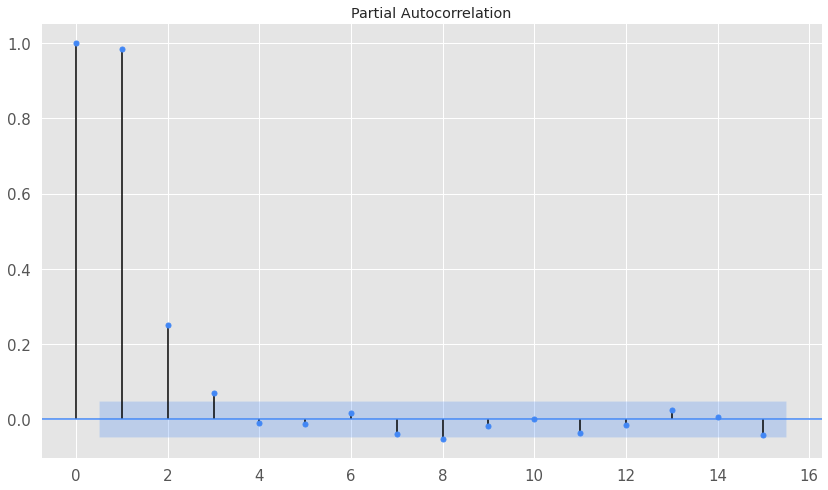

In [10]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))

plot_pacf(price[:1718+12], method="ywm", lags=15,ax=curr_ax)

for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor("#4287f5")
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color("black")    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color("#4287f5")

plt.show()

In [11]:
pacf(price[:1718+12], method="ywm")

array([ 1.        ,  0.9839491 ,  0.2500717 ,  0.06897732, -0.0098234 ,
       -0.01362257,  0.01501536, -0.04013037, -0.05170466, -0.01789171,
       -0.00102689, -0.03815652, -0.01544776,  0.02439618,  0.00639158,
       -0.04274255,  0.02280167,  0.01220739, -0.02763254, -0.05222543,
       -0.00311043,  0.00653666,  0.00743794, -0.02678852,  0.00550342,
        0.0156236 ,  0.02156592,  0.06274918,  0.02521033, -0.05580252,
        0.0402659 , -0.03328695, -0.03355111,  0.01135734, -0.01529149,
        0.03912339, -0.00770641,  0.00232131, -0.0102254 , -0.03261872,
        0.01080689])

In [12]:
2/np.sqrt(1730)

0.048084703683434496

## 75-35

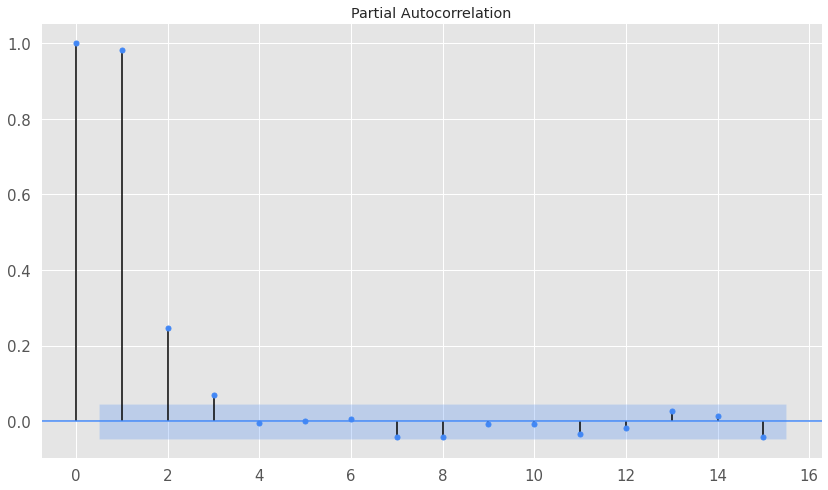

In [13]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))

plot_pacf(price[:1841+12], method="ywm", lags=15,ax=curr_ax)

for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor("#4287f5")
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color("black")    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color("#4287f5")

plt.show()

In [14]:
pacf(price[:1841+12], method="ywm")

array([ 1.00000000e+00,  9.82576885e-01,  2.47960358e-01,  6.93577854e-02,
       -5.26421586e-03,  6.40475680e-04,  6.02781684e-03, -4.06463534e-02,
       -4.18915046e-02, -8.40514959e-03, -6.35304219e-03, -3.43346346e-02,
       -1.80867666e-02,  2.78500522e-02,  1.41525037e-02, -4.14831407e-02,
        2.33427567e-02,  7.95094589e-03, -1.69090300e-02, -5.26778339e-02,
        4.09122987e-03,  5.13827618e-04, -7.40061047e-03, -1.65573623e-02,
       -3.58790516e-03,  3.26999280e-02,  1.86799160e-02,  6.01419712e-02,
        2.78190807e-02, -5.55659074e-02,  3.99488790e-02, -3.04837366e-02,
       -2.60049781e-02,  1.26702678e-02, -5.66493161e-03,  3.49451035e-02,
       -6.25047350e-03,  5.54312530e-04, -1.76859894e-02, -1.29573344e-02,
        8.50655499e-03])

In [15]:
2/np.sqrt(1853)

0.04646139935246818

## 80-20

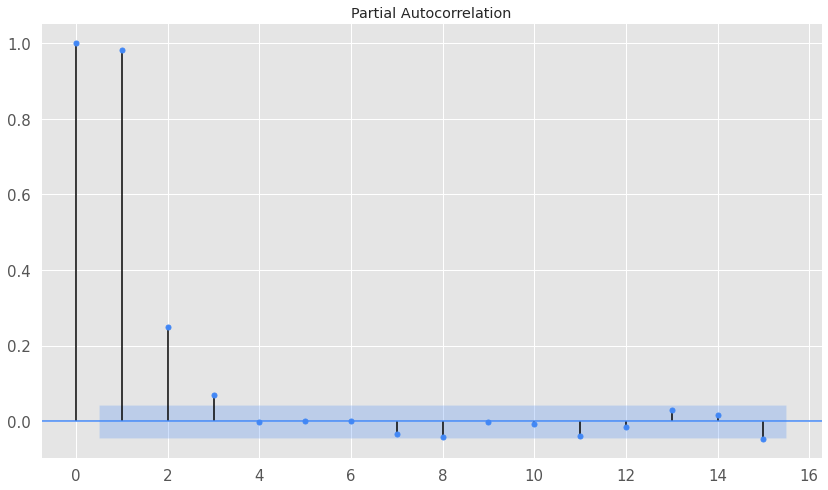

In [16]:
curr_fig, curr_ax = plt.subplots(figsize=(14, 8))

plot_pacf(price[:1963+12], method="ywm", lags=15,ax=curr_ax)

for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor("#4287f5")
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color("black")    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color("#4287f5")

plt.show()

In [17]:
pacf(price[:1963+12], method="ywm")

array([ 1.00000000e+00,  9.82085819e-01,  2.49012804e-01,  6.85031531e-02,
       -5.90777846e-04,  7.31114266e-04,  1.61756638e-03, -3.38458267e-02,
       -4.13337890e-02, -1.91400345e-03, -7.99979351e-03, -3.82435259e-02,
       -1.41895807e-02,  3.07175155e-02,  1.63149687e-02, -4.54693047e-02,
        2.25349265e-02,  1.34371429e-02, -1.50288682e-02, -4.60669008e-02,
       -7.55697890e-03, -4.14842825e-03, -3.73217448e-03, -2.10788421e-02,
       -5.56525203e-03,  2.46680427e-02,  1.55744984e-02,  6.21448668e-02,
        3.26221269e-02, -4.56192673e-02,  3.76944159e-02, -2.65201520e-02,
       -2.56499578e-02,  8.05902123e-03, -7.34665048e-03,  2.96080902e-02,
       -9.46964625e-03, -4.44131283e-03, -1.53980425e-02, -1.15962722e-02,
        5.75400250e-03])

In [18]:
2/np.sqrt(1975)

0.045003516037040954

# Analysis

In [ ]:
def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - (seq_len-1)): # seq_len diganti jadi (seq_len-1)
        d.append(data[index: index + seq_len])

    return np.array(d)

def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
SEQ_LEN = 12
SEQ = (9,10,11) #default

data = to_sequences(price, SEQ_LEN)
data = data.reshape(data.shape[0], SEQ_LEN)
data = data[:,SEQ]

train_split = 0.7

num_train = int(train_split * data.shape[0])

train = data[:num_train, :]
test = data[num_train:, :]

#tanggal_train = df["Tanggal"][11:1718+12].reset_index(drop = True) #70-30
#tanggal_test = df["Tanggal"][1718+12:].reset_index(drop = True)
#tanggal_train = df["Tanggal"][11:1841+12].reset_index(drop = True) #75-25
#tanggal_test = df["Tanggal"][1841+12:].reset_index(drop = True)
#tanggal_train = df["Tanggal"][11:1963+12].reset_index(drop = True) #80-30
#tanggal_test = df["Tanggal"][1963+12:].reset_index(drop = True)

In [ ]:
train.shape

(1719, 3)

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(train.reshape(-1,1))

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

X_train = train_scaled[:, :-1]
Y_train = train_scaled[:, -1].reshape(-1, 1)
X_test = test_scaled[:, :-1]
Y_test = test_scaled[:, -1].reshape(-1, 1)

In [ ]:
#reset_random_seeds()

model_mlp = Sequential()
model_mlp.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))

opt = tf.optimizers.RMSprop(learning_rate=0.001)
model_mlp.compile(
    loss='mean_squared_error', 
    optimizer=opt
)

BATCH_SIZE = 64

history = model_mlp.fit(
    X_train, 
    Y_train, 
    epochs=200, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    verbose=0
    )

y_hatTrain = model_mlp.predict(X_train)
#y_hat = model_mlp.predict(X_test)

y_train_inverse = scaler.inverse_transform(Y_train)
y_hatTrain_inverse = scaler.inverse_transform(y_hatTrain)

#y_test_inverse = scaler.inverse_transform(Y_test)
#y_hat_inverse = scaler.inverse_transform(y_hat)

MSEDataTraining = mse(y_hatTrain_inverse, y_train_inverse)
#MSEDataTesting = mse(y_hat_inverse, y_test_inverse)

print("Nilai MSE data train = {}".format(MSEDataTraining))
#print("Nilai MSE data test = {}".format(MSEDataTesting))

Nilai MSE data train = 30998.478386697414


In [ ]:
#model_mlp.save('/content/gdrive/My Drive/Kuliah/Skripsi/modelMLP')

# Predict

In [ ]:
model_mlp = tf.keras.models.load_model('/content/gdrive/My Drive/Kuliah/Skripsi/modelMLP')

y_hatTrain = model_mlp.predict(X_train)
y_hat = model_mlp.predict(X_test)

y_train_inverse = scaler.inverse_transform(Y_train)
y_hatTrain_inverse = scaler.inverse_transform(y_hatTrain)

y_test_inverse = scaler.inverse_transform(Y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

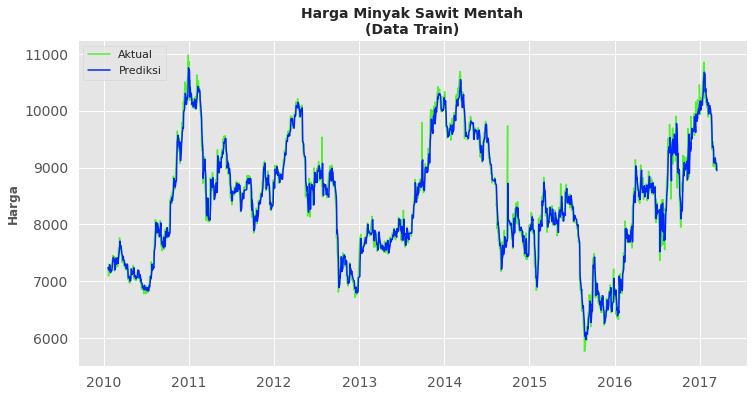

In [ ]:
y_train_inverse_df = pd.DataFrame(y_train_inverse, columns=["Aktual"]).reset_index(drop = True)
y_hatTrain_inverse_df = pd.DataFrame(y_hatTrain_inverse, columns=["Prediksi"]).reset_index(drop = True)
train_df = pd.concat([tanggal_train, y_train_inverse_df, y_hatTrain_inverse_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(train_df["Tanggal"], train_df["Aktual"], color = '#52f032')
sns.lineplot(train_df["Tanggal"], train_df["Prediksi"], color = '#0324fc')

ax.set_title('Harga Minyak Sawit Mentah\n(Data Train)', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('')
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
ax.legend(["Aktual", "Prediksi"])

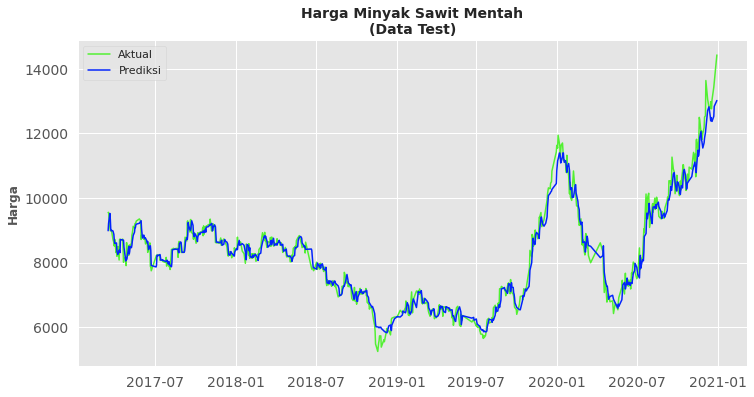

In [ ]:
y_test_inverse_df = pd.DataFrame(y_test_inverse, columns=["Aktual"]).reset_index(drop = True)
y_hat_inverse_df = pd.DataFrame(y_hat_inverse, columns=["Prediksi"]).reset_index(drop = True)
test_df = pd.concat([tanggal_test, y_test_inverse_df, y_hat_inverse_df], axis=1)

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(test_df["Tanggal"], test_df["Aktual"], color = '#52f032')
sns.lineplot(test_df["Tanggal"], test_df["Prediksi"], color = '#0324fc')

ax.set_title('Harga Minyak Sawit Mentah', fontsize = 14, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('')
ax.set_ylabel('Harga', fontsize = 12, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=14)
plt.tick_params(axis='x', which='major', labelsize=14)
ax.legend(["Aktual", "Prediksi"])

In [ ]:
RMSEDataTesting = rmse(y_hat_inverse, y_test_inverse)
print("Nilai RMSE yang dihasilkan sebesar = {}".format(RMSEDataTesting))

Nilai RMSE yang dihasilkan sebesar = 290.5909355384962


In [ ]:
MAPEDataTesting = mape(y_test_inverse, y_hat_inverse)
print("Nilai MAPE yang dihasilkan sebesar = {}%".format(MAPEDataTesting))

Nilai MAPE yang dihasilkan sebesar = 2.291655846297664%


# Weights

In [ ]:
for layer in model_mlp.layers:
    weights = layer.get_weights() 

weights_ho = weights[0]     #this is hidden to output
bias_ho = weights[1]
weights_ih = model_mlp.layers[0].get_weights()[0] #input to hidden
bias_ih = model_mlp.layers[0].get_weights()[1]

In [ ]:
weights_ih

array([[-0.44715357,  1.0502883 ,  0.62757164,  0.09454652,  0.36401418,
         0.72053516],
       [ 0.7431706 , -0.43035898,  0.690428  , -0.41402644, -0.69201183,
         0.63419586]], dtype=float32)

In [ ]:
bias_ih

array([ 0.0952781 ,  0.0698484 , -0.05837948,  0.29188997, -0.02116006,
        0.07014634], dtype=float32)

In [ ]:
weights_ho

array([[ 0.76145554],
       [ 0.47529992],
       [-0.72498065],
       [-0.92553204],
       [ 0.61719954],
       [ 0.8334375 ]], dtype=float32)

In [ ]:
bias_ho

array([0.07019287], dtype=float32)

In [ ]:
unseen = pd.read_excel('/content/gdrive/My Drive/Kuliah/Skripsi/CPO-bappebti-2.xlsx', parse_dates=['Tanggal'])
unseen = unseen[unseen['Penyerahan'] == "SPOT"].reset_index(drop = True)
unseen = unseen[["Tanggal", "Harga"]]

price_unseen = unseen.Harga.values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
scaler = scaler.fit(data.reshape(-1,1))
data_scaled = scaler.transform(data)

X_data = data_scaled[:, :-1]
Y_data = data_scaled[:, -1].reshape(-1, 1)

In [ ]:
reset_random_seeds()
 
model_data = Sequential()
model_data.add(Dense(5, activation='relu', input_dim=X_data.shape[1]))
model_data.add(Dense(1))
model_data.add(Activation('linear'))

opt = tf.optimizers.Adam(learning_rate=0.001)
model_data.compile(
    loss='mean_squared_error', 
    optimizer=opt
)
 
BATCH_SIZE = 64
 
history_data = model_data.fit(
    X_data, 
    Y_data, 
    epochs=200, 
    batch_size=BATCH_SIZE,
    verbose=0,
    shuffle=False
    )
 
model_evaluate_train = model_data.evaluate(X_data, Y_data)
print("Nilai evaluasi MSE data = {}".format(model_evaluate_train))

77/77 [==============================] - 0s 964us/step - loss: 5.2512e-04
Nilai evaluasi MSE data = 0.0005251237889751792


In [ ]:
n_features = SEQ_LEN - 1
SEQ = (0,9,10) # X(t-seq)/lag yang dipakai

test_predictions = []

first_eval_batch = Y_data[-n_features:]

current_batch_1 = first_eval_batch.reshape((1, n_features))
current_batch_2 = current_batch_1[:,SEQ]

for i in range(len(price_unseen)):

  pred = model_data.predict(current_batch_2)[0]
  #pred = model_mlp.predict(current_batch_2)[0]

  test_predictions.append(pred)

  current_batch_1 = np.append(current_batch_1[:,1:],
                              [pred],
                              axis=1)
  current_batch_2 = current_batch_1[:,SEQ]

In [ ]:
actual_predictions = scaler.inverse_transform(test_predictions)

unseen['actual_predictions'] = actual_predictions
unseen

,Tanggal,Harga,actual_predictions
0,2021-01-05,14913,13941.980234
1,2021-01-06,15288,14004.962547
2,2021-01-07,15934,13889.972187
3,2021-01-08,15752,13838.859462
4,2021-01-11,15539,13800.594284
5,2021-01-12,15138,13745.022460
6,2021-01-13,14567,13703.974449
7,2021-01-14,14457,13692.722722
8,2021-01-15,14246,13712.772250
9,2021-01-18,13698,13730.896507


In [ ]:
RMSEDataTesting = rmse(actual_predictions[:18], price_unseen[:18])
print("Nilai RMSE yang dihasilkan sebesar = {}".format(RMSEDataTesting))

Nilai RMSE yang dihasilkan sebesar = 1518.197938973646


In [ ]:
MAPEDataTesting = mape(price_unseen[:18], actual_predictions[:18])
print("Nilai MAPE yang dihasilkan sebesar = {}%".format(MAPEDataTesting))

Nilai MAPE yang dihasilkan sebesar = 9.455843771871052%


In [ ]:
SEQ_LEN = 12
SEQ = (8,10,11)

price = df.Harga.values.reshape(-1, 1)

data = to_sequences(price, SEQ_LEN)
data = data.reshape(data.shape[0], SEQ_LEN)
data = data[:,SEQ]

train_split = 0.7

num_train = int(train_split * data.shape[0])

train = data[:num_train, :]
test = data[num_train:, :]

scaler = MinMaxScaler()
scaler = scaler.fit(train.reshape(-1,1))

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

X_train = train_scaled[:, :-1]
Y_train = train_scaled[:, -1].reshape(-1, 1)
X_test = test_scaled[:, :-1]
Y_test = test_scaled[:, -1].reshape(-1, 1)

MSETrain_all=[]

opt = tf.optimizers.RMSprop(learning_rate=0.001)
#units=np.arange(3,9)
repeats = 10
for r in range(repeats):
    model_mlp = Sequential()
    model_mlp.add(Dense(8, activation='relu', input_dim=X_train.shape[1]))
    model_mlp.add(Dense(1))
    model_mlp.add(Activation('linear'))
    
    model_mlp.compile(
        loss='mean_squared_error', 
        optimizer=opt
    )
    
    model_mlp.fit(
        X_train, 
        Y_train, 
        epochs=200, 
        batch_size=64,
        shuffle=False,
        verbose=0
    )
        
    y_hatTrain = model_mlp.predict(X_train)
    y_train_inverse = scaler.inverse_transform(Y_train)
        
    y_hatTrain_inverse = scaler.inverse_transform(y_hatTrain)
        
    MSEDataTraining = mse(y_hatTrain_inverse, y_train_inverse)
        
    MSETrain_all.append(MSEDataTraining)

print("Nilai MSE Train All")
for v in MSETrain_all:
    print(v)

Nilai MSE Train All
32146.65658792165
33746.26713794965
33157.008374607794
32818.79585654046
33234.940644566304
32560.290542146922
33247.29742892417
33442.77661311287
31702.553437887338
32144.94940002662
